In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.inspection import permutation_importance
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
from matplotlib.colors import ListedColormap
from scipy import stats
import pickle
import os

In [2]:
datasets = {
    "datafile.csv": pd.read_csv("datafile.csv"),
    "datafile1.csv": pd.read_csv("datafile1.csv"),
    "datafile2.csv": pd.read_csv("datafile2.csv"),
    "datafile3.csv": pd.read_csv("datafile3.csv"),
    "produce.csv": pd.read_csv("produce.csv")
}

for name, df in datasets.items():
    print(f"Dataset - {name}:")
    print(df.head())
    print(f"Dimensions: {df.shape}")
    print("\n")

Dataset - datafile.csv:
             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  
Dimensions: (13, 9)


Dataset - datafile1.csv:
    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR   

In [3]:
for name, df in datasets.items():
    print(f"Summary statistics for {name}:")
    print(df.describe())
    print("\n")

Summary statistics for datafile.csv:
       2004-05    2005-06     2006-07     2007-08     2008-09     2009-10  \
count     12.0   12.00000   12.000000   12.000000   12.000000   12.000000   
mean     100.0   99.75000  102.000000  104.750000  106.416667  114.916667   
std        0.0    6.64865   12.634728   10.963783   11.261022   15.900019   
min      100.0   86.00000   85.000000   87.000000   80.000000   81.000000   
25%      100.0   96.75000   96.250000   97.750000  101.250000  106.250000   
50%      100.0  100.00000  100.000000  102.000000  107.500000  115.500000   
75%      100.0  103.25000  104.750000  115.000000  113.000000  123.250000   
max      100.0  109.00000  134.000000  124.000000  124.000000  146.000000   

          2010-11     2011-12  
count   12.000000   12.000000  
mean   121.916667  120.750000  
std     11.405408   12.800036  
min     99.000000  102.000000  
25%    116.250000  109.500000  
50%    122.500000  120.500000  
75%    129.250000  130.750000  
max    138.00

In [4]:
def calculate_missing_percentage(df):
    missing_values = df.isnull().sum()
    total_values = df.shape[0]
    missing_percentage = (missing_values / total_values) * 100
    return missing_percentage

for name, df in datasets.items():
    missing_percentage = calculate_missing_percentage(df)
    print(f"Percentage of missing values in {name}:\n", missing_percentage)
    print("\n")

Percentage of missing values in datafile.csv:
 Crop       7.692308
2004-05    7.692308
2005-06    7.692308
2006-07    7.692308
2007-08    7.692308
2008-09    7.692308
2009-10    7.692308
2010-11    7.692308
2011-12    7.692308
dtype: float64


Percentage of missing values in datafile1.csv:
 Crop                                     0.0
State                                    0.0
Cost of Cultivation (`/Hectare) A2+FL    0.0
Cost of Cultivation (`/Hectare) C2       0.0
Cost of Production (`/Quintal) C2        0.0
Yield (Quintal/ Hectare)                 0.0
dtype: float64


Percentage of missing values in datafile2.csv:
 Crop                  0.0
Production 2006-07    0.0
Production 2007-08    0.0
Production 2008-09    0.0
Production 2009-10    0.0
Production 2010-11    0.0
Area 2006-07          0.0
Area 2007-08          0.0
Area 2008-09          0.0
Area 2009-10          0.0
Area 2010-11          0.0
Yield 2006-07         0.0
Yield 2007-08         0.0
Yield 2008-09         0.0
Yield 200

In [5]:
def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    return df

def remove_high_missing_columns(df, threshold=50):
    missing_percentage = calculate_missing_percentage(df)
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    return df

for name, df in datasets.items():
    datasets[name] = impute_missing_values(df)
    datasets[name] = remove_high_missing_columns(datasets[name])

for name, df in datasets.items():
    print(f"Missing values in {name} after handling:\n", df.isnull().sum())
    print("\n")

Missing values in datafile.csv after handling:
 Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64


Missing values in datafile1.csv after handling:
 Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64


Missing values in datafile2.csv after handling:
 Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64


Missing values in datafile3.csv after handling:
 C

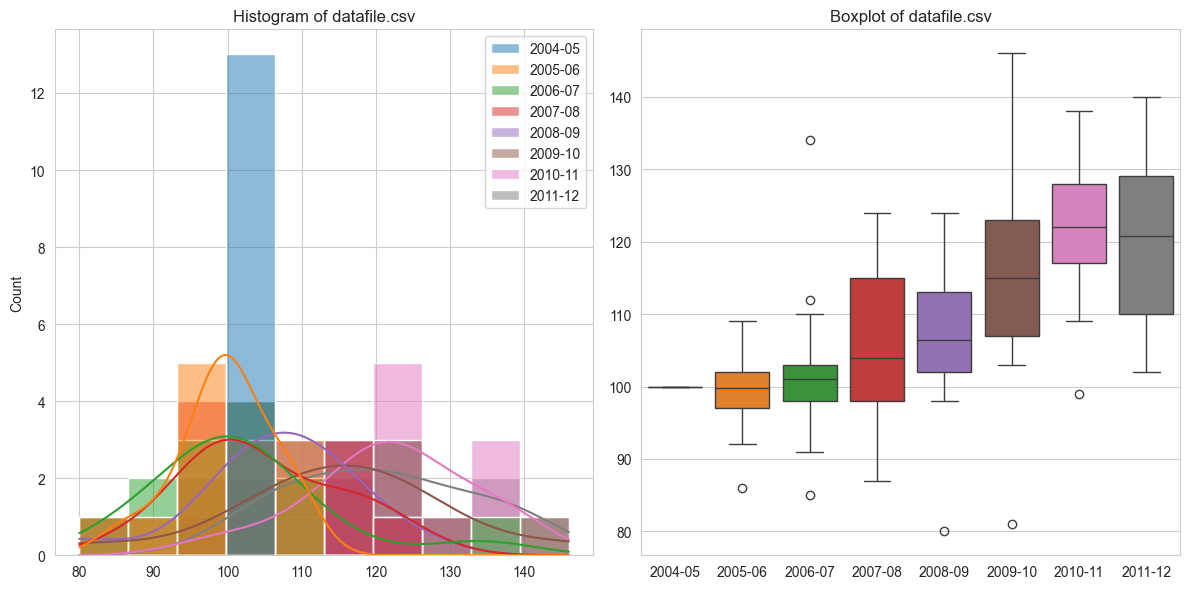

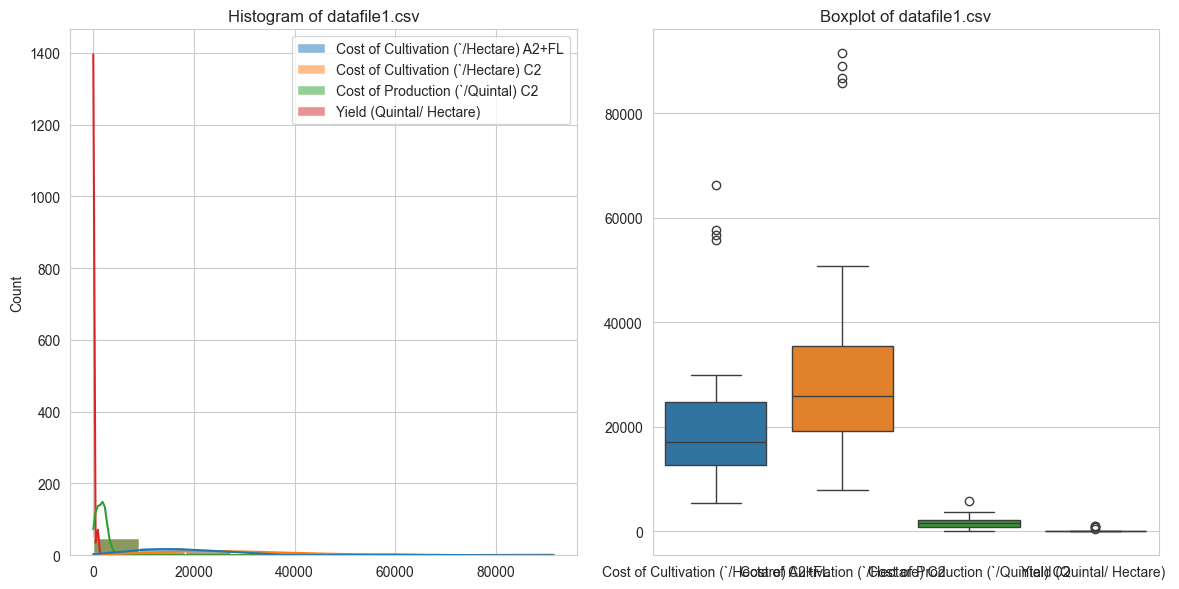

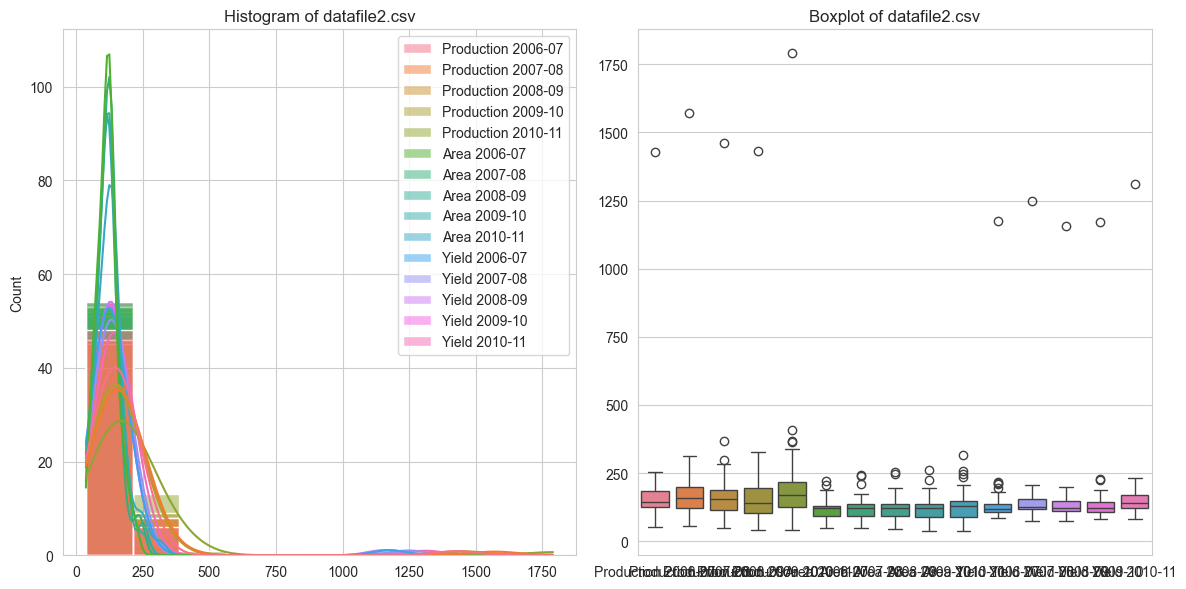

No numeric columns found in datafile3.csv for visualization.


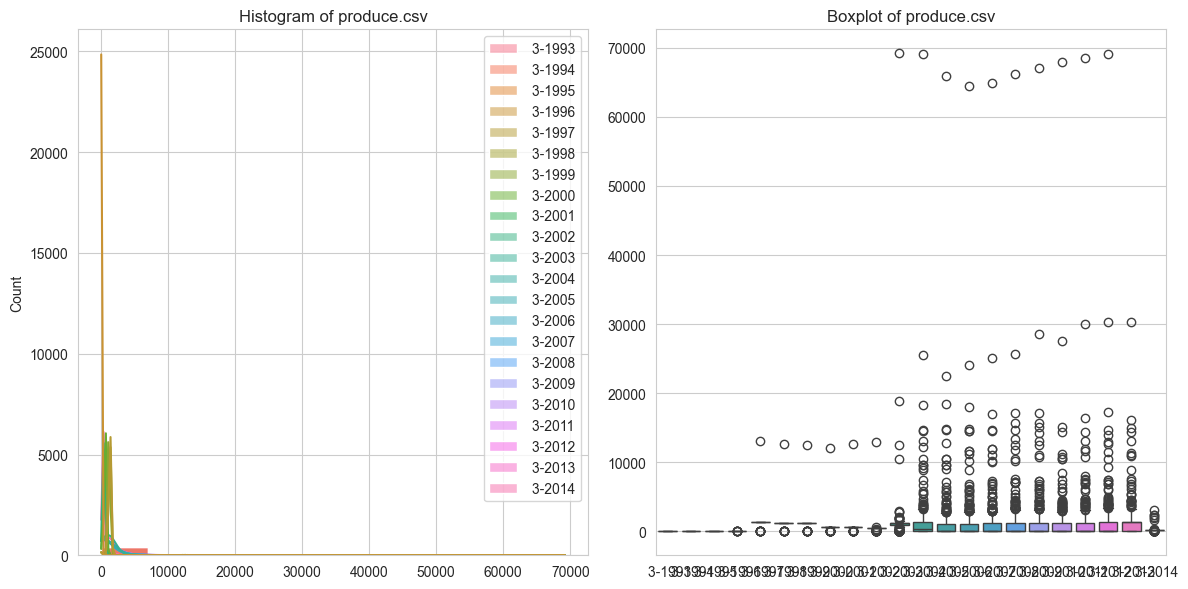

In [6]:
sns.set_style("whitegrid")

for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df[numeric_cols], bins=10, kde=True)
        plt.title(f"Histogram of {name}")

        plt.subplot(1, 2, 2)
        sns.boxplot(data=df[numeric_cols])
        plt.title(f"Boxplot of {name}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No numeric columns found in {name} for visualization.")

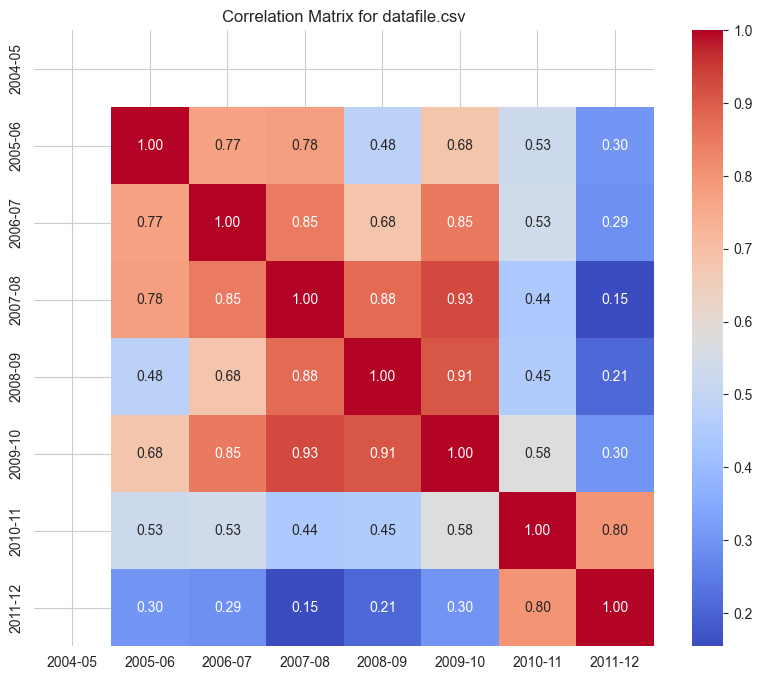

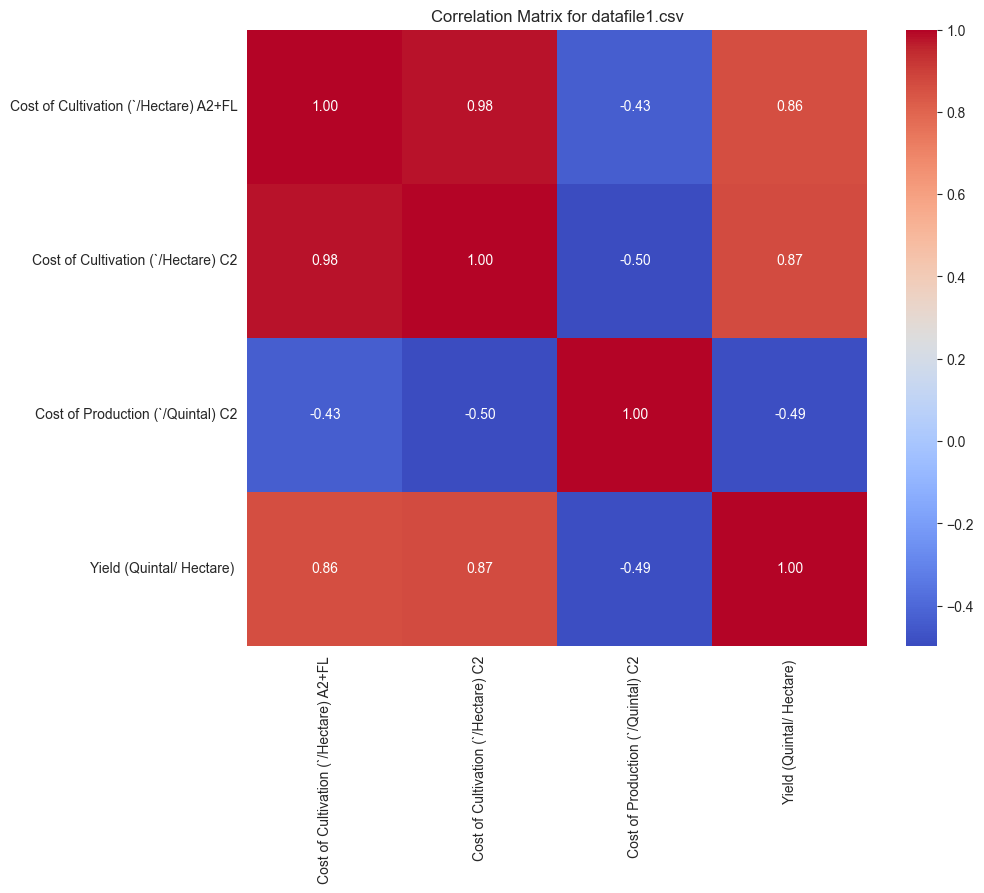

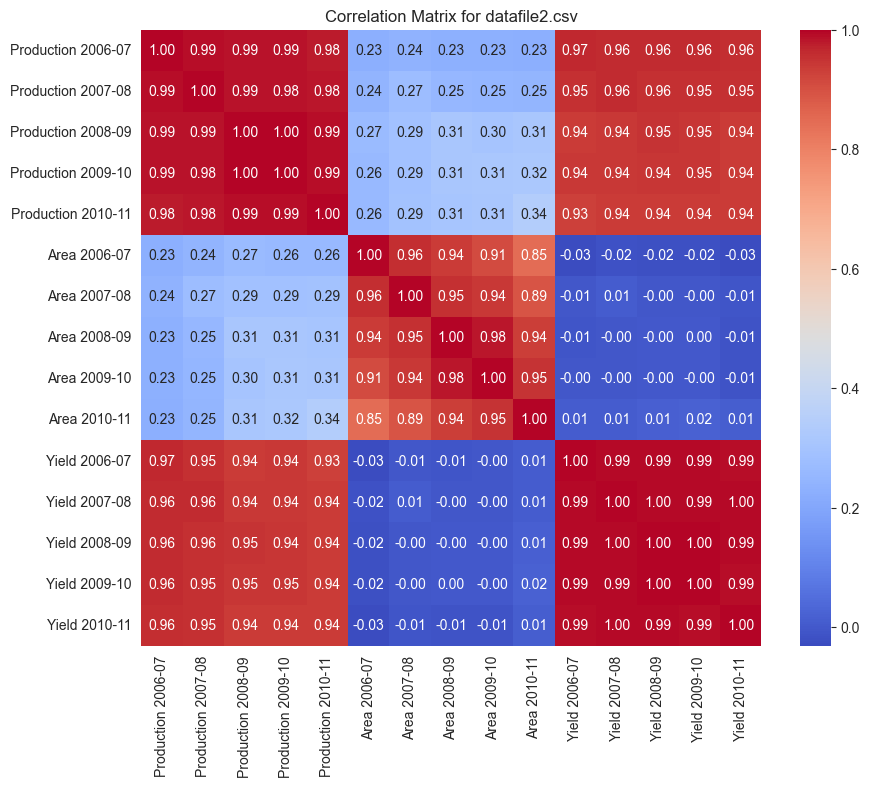

No numeric columns found in the dataset for Correlation Matrix for datafile3.csv.


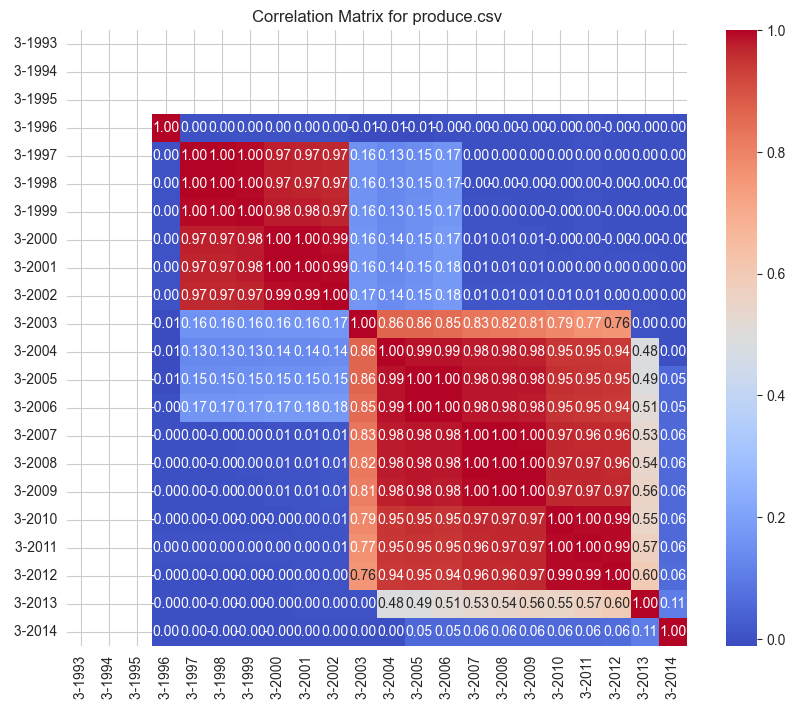

In [7]:
def compute_correlation_matrix(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        corr_matrix = df[numeric_cols].corr()
        return corr_matrix
    else:
        return pd.DataFrame()  
        
corr_matrices = {name: compute_correlation_matrix(df) for name, df in datasets.items()}

def plot_correlation_heatmap(corr_matrix, title):
    if not corr_matrix.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(title)
        plt.show()
    else:
        print(f"No numeric columns found in the dataset for {title}.")

for name, corr_matrix in corr_matrices.items():
    plot_correlation_heatmap(corr_matrix, f"Correlation Matrix for {name}")

In [8]:
def calculate_missing_percentage(df):
    missing_values = df.isnull().sum()
    total_values = df.shape[0]
    missing_percentage = (missing_values / total_values) * 100
    return missing_percentage

def impute_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    return df

def remove_high_missing_columns(df, threshold=50):
    missing_percentage = calculate_missing_percentage(df)
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    return df

for name, df in datasets.items():
    print(f"Missing values percentage in {name} before handling:\n", calculate_missing_percentage(df))
    print("\n")
    datasets[name] = impute_missing_values(df)
    datasets[name] = remove_high_missing_columns(datasets[name])
    
    print(f"Missing values in {name} after handling:\n", datasets[name].isnull().sum())
    print("\n")
for name, df in datasets.items():
    print(f"Dataset - {name} dimensions after handling missing values: {df.shape}")
    print(f"Summary statistics for {name} after handling missing values:")
    print(df.describe())
    print("\n")

Missing values percentage in datafile.csv before handling:
 Crop       0.0
2004-05    0.0
2005-06    0.0
2006-07    0.0
2007-08    0.0
2008-09    0.0
2009-10    0.0
2010-11    0.0
2011-12    0.0
dtype: float64


Missing values in datafile.csv after handling:
 Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64


Missing values percentage in datafile1.csv before handling:
 Crop                                     0.0
State                                    0.0
Cost of Cultivation (`/Hectare) A2+FL    0.0
Cost of Cultivation (`/Hectare) C2       0.0
Cost of Production (`/Quintal) C2        0.0
Yield (Quintal/ Hectare)                 0.0
dtype: float64


Missing values in datafile1.csv after handling:
 Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2      

In [9]:
def get_categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def apply_label_encoding(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def apply_one_hot_encoding(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df

for name, df in datasets.items():
    print(f"Processing {name}")
    categorical_columns = get_categorical_columns(df)
    print(f"Categorical columns in {name}: {categorical_columns}")
    datasets[name] = apply_one_hot_encoding(df, categorical_columns)
    print(f"First few rows of {name} after encoding:")
    print(datasets[name].head())
    print("\n")

Processing datafile.csv
Categorical columns in datafile.csv: Index(['Crop'], dtype='object')
First few rows of datafile.csv after encoding:
   2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  2010-11  2011-12  \
0    100.0    101.0     99.0    105.0    112.0    121.0    117.0    110.0   
1    100.0    101.0    112.0    115.0    117.0    127.0    120.0    108.0   
2    100.0    107.0    110.0    115.0    113.0    123.0    122.0    136.0   
3    100.0    108.0    134.0    124.0    124.0    146.0    137.0    129.0   
4    100.0    109.0    103.0    118.0    113.0    124.0    128.0    115.0   

   Crop_All Agriculture  Crop_Coarse Cereals  Crop_Eggs, Fish and Meat  \
0                 False                False                     False   
1                 False                False                     False   
2                 False                 True                     False   
3                 False                False                     False   
4                 False    

In [10]:
def apply_min_max_scaling(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def apply_standardization(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def apply_robust_scaling(df, columns):
    scaler = RobustScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

def get_numerical_columns(df):
    return df.select_dtypes(include='number').columns.tolist()

for name, df in datasets.items():
    print(f"Processing {name}")
    
    numerical_columns = get_numerical_columns(df)
    print(f"Numerical columns in {name}: {numerical_columns}")
    
    if numerical_columns:
        datasets[name] = apply_min_max_scaling(df, numerical_columns)
        print(f"First few rows of {name} after scaling:")
        print(datasets[name].head())
        print("\n")
    else:
        print("No numerical columns found in the dataset. Skipping scaling.")

Processing datafile.csv
Numerical columns in datafile.csv: ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
First few rows of datafile.csv after scaling:
   2004-05   2005-06   2006-07   2007-08   2008-09   2009-10   2010-11  \
0      0.0  0.652174  0.285714  0.486486  0.727273  0.615385  0.461538   
1      0.0  0.652174  0.551020  0.756757  0.840909  0.707692  0.538462   
2      0.0  0.913043  0.510204  0.756757  0.750000  0.646154  0.589744   
3      0.0  0.956522  1.000000  1.000000  1.000000  1.000000  0.974359   
4      0.0  1.000000  0.367347  0.837838  0.750000  0.661538  0.743590   

    2011-12  Crop_All Agriculture  Crop_Coarse Cereals  \
0  0.210526                 False                False   
1  0.157895                 False                False   
2  0.894737                 False                 True   
3  0.710526                 False                False   
4  0.342105                 False                False   

   Crop_Eggs

In [11]:
def detect_outliers_z_score(df, threshold=3):
    from scipy import stats
    numeric_cols = df.select_dtypes(include=np.number)
    z_scores = np.abs(stats.zscore(numeric_cols))
    outlier_indices = np.where(z_scores > threshold)
    return outlier_indices

def detect_outliers_iqr(df):
    from scipy.stats import iqr
    numeric_cols = df.select_dtypes(include=np.number)
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices = np.where((numeric_cols < lower_bound) | (numeric_cols > upper_bound))
    return outlier_indices

for name, df in datasets.items():
    print(f"Processing {name}:")
    outliers_z_score_indices = detect_outliers_z_score(df)
    print(f"Outliers detected using Z-score method: {outliers_z_score_indices[0]}")
    outliers_iqr_indices = detect_outliers_iqr(df)
    print(f"Outliers detected using IQR method: {outliers_iqr_indices[0]}")
    df_no_outliers_z_score = df.drop(outliers_z_score_indices[0])
    df_no_outliers_iqr = df.drop(outliers_iqr_indices[0])
    print("\n")


Processing datafile.csv:
Outliers detected using Z-score method: []
Outliers detected using IQR method: [1 3 8 8 8 9 9]


Processing datafile1.csv:
Outliers detected using Z-score method: [27 41 42 44 44]
Outliers detected using IQR method: [27 40 41 41 41 42 42 42 43 43 43 44 44 44]


Processing datafile2.csv:
Outliers detected using Z-score method: [25 25 38 38 38 38 38 38 38 38 38 38 46 51]
Outliers detected using IQR method: [25 25 25 25 25 25 31 31 33 33 37 38 38 38 38 38 38 38 38 38 38 40 41 41
 46 46 51 51 51 51 51 51 51 52]


Processing datafile3.csv:
Outliers detected using Z-score method: []
Outliers detected using IQR method: []


Processing produce.csv:
Outliers detected using Z-score method: [ 54  54  54  54  54  54  54  54  54  55  76  79  82 177 177 177 177 177
 177 177 178 178 178 178 178 178 178 178 178 178 179 235 253 253 253 253
 273 279 279 281 281 281 281 281 281 281 281 281 300 321 323 328 329 331
 333 336 336 336 336 336 336 336 336 336 336 337 342 342 342 342 34

In [12]:
def create_new_features(df):
    new_df = df.copy()
    if 'existing_feature1' in new_df.columns and 'existing_feature2' in new_df.columns:
        new_df['new_feature'] = new_df['existing_feature1'] + new_df['existing_feature2']
    else:
        print("Columns 'existing_feature1' and/or 'existing_feature2' not found in the DataFrame.")
    if 'existing_feature' in new_df.columns:
        new_df['existing_feature_squared'] = new_df['existing_feature'] ** 2
        new_df['existing_feature_cubed'] = new_df['existing_feature'] ** 3
    else:
        print("Column 'existing_feature' not found in the DataFrame.")
    if 'datetime_column' in new_df.columns:
        new_df['month'] = new_df['datetime_column'].dt.month
        new_df['day_of_week'] = new_df['datetime_column'].dt.dayofweek
    else:
        print("Column 'datetime_column' not found in the DataFrame.")
    if 'category' in new_df.columns:
        new_df['mean_feature_by_category'] = new_df.groupby('category')['existing_feature'].transform('mean')
    else:
        print("Column 'category' not found in the DataFrame.")
    return new_df
for name, df in datasets.items():
    print(f"Processing {name}:")
    df_with_new_features = create_new_features(df)
    print(f"New features added to {name}:\n{df_with_new_features}")


Processing datafile.csv:
Columns 'existing_feature1' and/or 'existing_feature2' not found in the DataFrame.
Column 'existing_feature' not found in the DataFrame.
Column 'datetime_column' not found in the DataFrame.
Column 'category' not found in the DataFrame.
New features added to datafile.csv:
    2004-05   2005-06   2006-07   2007-08   2008-09   2009-10   2010-11  \
0       0.0  0.652174  0.285714  0.486486  0.727273  0.615385  0.461538   
1       0.0  0.652174  0.551020  0.756757  0.840909  0.707692  0.538462   
2       0.0  0.913043  0.510204  0.756757  0.750000  0.646154  0.589744   
3       0.0  0.956522  1.000000  1.000000  1.000000  1.000000  0.974359   
4       0.0  1.000000  0.367347  0.837838  0.750000  0.661538  0.743590   
5       0.0  0.565217  0.285714  0.297297  0.500000  0.353846  0.384615   
6       0.0  0.478261  0.265306  0.297297  0.409091  0.476923  0.615385   
7       0.0  0.695652  0.326531  0.351351  0.431818  0.538462  0.871795   
8       0.0  0.000000  0.000

In [13]:
def log_transform(df, columns):
    transformed_df = df.copy()
    existing_columns = [col for col in columns if col in transformed_df.columns]
    if not existing_columns:
        print("Specified columns not found in the DataFrame.")
        return transformed_df
    transformed_df[existing_columns] = np.log1p(transformed_df[existing_columns])
    return transformed_df

columns_to_transform = ["feature1", "feature2"]

for name, df in datasets.items():
    print(f"Processing {name}:")
    transformed_df = log_transform(df, columns_to_transform)
    print(f"First few rows of {name} after log transformation:")
    print(transformed_df.head())
    print("\n")

Processing datafile.csv:
Specified columns not found in the DataFrame.
First few rows of datafile.csv after log transformation:
   2004-05   2005-06   2006-07   2007-08   2008-09   2009-10   2010-11  \
0      0.0  0.652174  0.285714  0.486486  0.727273  0.615385  0.461538   
1      0.0  0.652174  0.551020  0.756757  0.840909  0.707692  0.538462   
2      0.0  0.913043  0.510204  0.756757  0.750000  0.646154  0.589744   
3      0.0  0.956522  1.000000  1.000000  1.000000  1.000000  0.974359   
4      0.0  1.000000  0.367347  0.837838  0.750000  0.661538  0.743590   

    2011-12  Crop_All Agriculture  Crop_Coarse Cereals  \
0  0.210526                 False                False   
1  0.157895                 False                False   
2  0.894737                 False                 True   
3  0.710526                 False                False   
4  0.342105                 False                False   

   Crop_Eggs, Fish and Meat  Crop_Fibers  Crop_Fruits  Crop_Milk  \
0         

In [14]:
for name, df in datasets.items():
    print(f"Columns in {name}: {df.columns.tolist()}")

Columns in datafile.csv: ['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', 'Crop_All Agriculture', 'Crop_Coarse Cereals', 'Crop_Eggs, Fish and Meat', 'Crop_Fibers', 'Crop_Fruits', 'Crop_Milk', 'Crop_Oilseeds', 'Crop_Pulses', 'Crop_Rice', 'Crop_Sugarcane ', 'Crop_Vegetables ', 'Crop_Wheat']
Columns in datafile1.csv: ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ', 'Crop_ARHAR', 'Crop_COTTON', 'Crop_GRAM', 'Crop_GROUNDNUT', 'Crop_MAIZE', 'Crop_MOONG', 'Crop_PADDY', 'Crop_RAPESEED AND MUSTARD', 'Crop_SUGARCANE', 'Crop_WHEAT', 'State_Andhra Pradesh', 'State_Bihar', 'State_Gujarat', 'State_Haryana', 'State_Karnataka', 'State_Madhya Pradesh', 'State_Maharashtra', 'State_Orissa', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Uttar Pradesh', 'State_West Bengal']
Columns in datafile2.csv: ['Production 2006-07', 'Production 2007-08', 'Production 

In [15]:
top_n_features = 10
def preprocess_features(X):
    categorical_cols = X.select_dtypes(include=['object']).columns
    numeric_cols = X.select_dtypes(exclude=['object']).columns
    
    print(f"Categorical columns: {categorical_cols}")
    print(f"Numeric columns: {numeric_cols}")
    transformers = []
    if len(numeric_cols) > 0:
        transformers.append(('num', SimpleImputer(strategy='median'), numeric_cols))
    if len(categorical_cols) > 0:
        transformers.append(('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols))
    
    preprocessor = ColumnTransformer(transformers)
    X_processed = preprocessor.fit_transform(X)
    return X_processed, preprocessor, categorical_cols, numeric_cols

target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07",  
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation" 
}

for name, df in datasets.items():
    print(f"Processing {name}:")
    if target_columns[name] not in df.columns:
        print(f"Target column '{target_columns[name]}' not found in {name}")
        continue
    X = df.drop(columns=[target_columns[name]])
    y = df[target_columns[name]]
    X_processed, preprocessor, categorical_cols, numeric_cols = preprocess_features(X)
    print(f"Shape of processed features: {X_processed.shape}")
    if X_processed.shape[1] == 0:
        print(f"No features found after preprocessing {name}. Skipping this dataset.")
        continue
    target_type = type_of_target(y)
    
    if target_type in ['binary', 'multiclass']:
        rf_model = RandomForestClassifier()
    elif target_type == 'continuous':
        rf_model = RandomForestRegressor()
    else:
        print(f"Unsupported target type '{target_type}' for {name}. Skipping this dataset.")
        continue
    rf_model.fit(X_processed, y)
    feature_importances = rf_model.feature_importances_
    if len(categorical_cols) > 0:
        onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
        feature_names = onehot_feature_names.tolist() + numeric_cols.tolist()
    else:
        feature_names = numeric_cols.tolist()
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    top_features = feature_importance_df.head(top_n_features)['Feature'].tolist()
    datasets[name] = df[top_features + [target_columns[name]]]
    print(f"Top {top_n_features} features selected for {name}:")
    print(top_features)
    print("\n")

Processing datafile.csv:
Categorical columns: Index([], dtype='object')
Numeric columns: Index(['2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12', 'Crop_Coarse Cereals', 'Crop_Eggs, Fish and Meat',
       'Crop_Fibers', 'Crop_Fruits', 'Crop_Milk', 'Crop_Oilseeds',
       'Crop_Pulses', 'Crop_Rice', 'Crop_Sugarcane ', 'Crop_Vegetables ',
       'Crop_Wheat'],
      dtype='object')
Shape of processed features: (13, 19)
Top 10 features selected for datafile.csv:
['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2011-12', '2010-11', 'Crop_Wheat', 'Crop_Milk', 'Crop_Fruits']


Processing datafile1.csv:
Categorical columns: Index([], dtype='object')
Numeric columns: Index(['Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Crop_ARHAR', 'Crop_COTTON', 'Crop_GRAM', 'Crop_GROUNDNUT',
       'Crop_MAIZE', 'Crop_MOONG', 'Crop_PADDY', 'Crop_RAPESEED AND MUSTARD',
       'Crop_SUGA

In [16]:
train_test_splits = {}

for name, df in datasets.items():
    print(f"Processing {name}:")
    if target_columns[name] not in df.columns:
        print(f"Target column '{target_columns[name]}' not found in {name}")
        continue
    X = df.drop(columns=[target_columns[name]])
    y = df[target_columns[name]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    train_test_splits[name] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    
    print(f"Training set size: {X_train.shape}")
    print(f"Testing set size: {X_test.shape}")
    print("\n")



Processing datafile.csv:
Training set size: (10, 10)
Testing set size: (3, 10)


Processing datafile1.csv:
Training set size: (39, 10)
Testing set size: (10, 10)


Processing datafile2.csv:
Training set size: (44, 10)
Testing set size: (11, 10)


Processing datafile3.csv:
Training set size: (62, 10)
Testing set size: (16, 10)


Processing produce.csv:
Training set size: (343, 10)
Testing set size: (86, 10)




In [17]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
results = {}

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for name, df in datasets.items():
    print(f"Processing {name}:")
    target_column = target_columns[name]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {name}")
        continue
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    target_type = type_of_target(y)
    if target_type in ['binary', 'multiclass']:
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = {'Model': 'RandomForestClassifier', 'Accuracy': accuracy}
        print(f"Accuracy for {name}: {accuracy:.2f}")
    elif target_type == 'continuous':
        model = RandomForestRegressor(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        results[name] = {'Model': 'RandomForestRegressor', 'Mean Squared Error': mse}
        print(f"Mean Squared Error for {name}: {mse:.2f}")
    else:
        print(f"Unsupported target type '{target_type}' for {name}. Skipping this dataset.")
        continue
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file) 
    
for dataset, result in results.items():
    print(f"{dataset}:")
    for metric, value in result.items():
        print(f"  {metric}: {value}")
    print("\n")


Processing datafile.csv:
Accuracy for datafile.csv: 0.75
Processing datafile1.csv:
Mean Squared Error for datafile1.csv: 0.00
Processing datafile2.csv:
Mean Squared Error for datafile2.csv: 0.00
Processing datafile3.csv:
Accuracy for datafile3.csv: 0.88
Processing produce.csv:
Accuracy for produce.csv: 1.00
datafile.csv:
  Model: RandomForestClassifier
  Accuracy: 0.75


datafile1.csv:
  Model: RandomForestRegressor
  Mean Squared Error: 0.004319609873300674


datafile2.csv:
  Model: RandomForestRegressor
  Mean Squared Error: 0.00032161370694739835


datafile3.csv:
  Model: RandomForestClassifier
  Accuracy: 0.875


produce.csv:
  Model: RandomForestClassifier
  Accuracy: 1.0




In [18]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def preprocess_features(X):
    numeric_cols = X.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
        scaler = StandardScaler()
        X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    return X
results = {}

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for name, df in datasets.items():
    print(f"Processing {name}:")
    target_column = target_columns[name]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {name}")
        continue
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X = preprocess_features(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    target_type = type_of_target(y)
    models = []
    if target_type in ['binary', 'multiclass']:
        models = [
            ('Decision Tree', DecisionTreeClassifier(random_state=42)),
            ('Random Forest', RandomForestClassifier(random_state=42)),
            ('SVM', SVC(random_state=42)),
            ('Neural Network', MLPClassifier(random_state=42, max_iter=1000))
        ]
    elif target_type == 'continuous':
        models = [
            ('Decision Tree', DecisionTreeRegressor(random_state=42)),
            ('Random Forest', RandomForestRegressor(random_state=42)),
            ('SVM', SVR()),
            ('Neural Network', MLPRegressor(random_state=42, max_iter=1000))
        ]
    else:
        print(f"Unsupported target type '{target_type}' for {name}. Skipping this dataset.")
        continue
    best_model_name = None
    best_model_score = None
    best_model = None
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        if target_type in ['binary', 'multiclass']:
            score = accuracy_score(y_test, y_pred)
        elif target_type == 'continuous':
            score = mean_squared_error(y_test, y_pred, squared=False)
        print(f"{model_name} - Score: {score}")
        if best_model_score is None or (target_type in ['binary', 'multiclass'] and score > best_model_score) or (target_type == 'continuous' and score < best_model_score):
            best_model_name = model_name
            best_model_score = score
            best_model = model
    results[name] = {
        'Best Model': best_model_name,
        'Best Score': best_model_score,
        'Model': best_model
    }
    print(f"Best model for {name}: {best_model_name} with score: {best_model_score}\n")

    # Save the trained model
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)


for dataset, result in results.items():
    print(f"{dataset}:")
    for metric, value in result.items():
        if metric != 'Model':
            print(f"  {metric}: {value}")
    print("\n")


Processing datafile.csv:
Decision Tree - Score: 0.75
Random Forest - Score: 0.75
SVM - Score: 0.75
Neural Network - Score: 0.75
Best model for datafile.csv: Decision Tree with score: 0.75

Processing datafile1.csv:
Decision Tree - Score: 0.06641076695926829
Random Forest - Score: 0.06572373903925943
SVM - Score: 0.15776951594990268
Neural Network - Score: 0.12768724259773542
Best model for datafile1.csv: Random Forest with score: 0.06572373903925943

Processing datafile2.csv:
Decision Tree - Score: 0.01690073013992146
Random Forest - Score: 0.017933591579697535
SVM - Score: 0.07411999705662076
Neural Network - Score: 0.061445067105003394
Best model for datafile2.csv: Decision Tree with score: 0.01690073013992146

Processing datafile3.csv:
Decision Tree - Score: 0.875
Random Forest - Score: 0.875
SVM - Score: 0.9583333333333334
Neural Network - Score: 0.875
Best model for datafile3.csv: SVM with score: 0.9583333333333334

Processing produce.csv:
Decision Tree - Score: 1.0
Random Forest 

In [19]:
warnings.filterwarnings("ignore", category=FitFailedWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def preprocess_features(X):
    numeric_cols = X.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
        scaler = StandardScaler()
        X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
    return X
param_grids = {
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf']
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50, 50), (100,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'max_iter': [1000, 2000] 
    }
}
results = {}
for name, df in datasets.items():
    print(f"Processing {name}:")
    target_column = target_columns[name]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {name}")
        continue
    X = df.drop(columns=[target_column])
    y = df[target_column]
    X = preprocess_features(X)
    target_type = type_of_target(y)
    stratify = y if target_type in ['binary', 'multiclass'] and len(np.unique(y)) > 1 and all(np.bincount(y) >= 2) else None
    if stratify is None:
        print("Stratified splitting is not feasible, using regular split.")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=stratify)
    models = []
    if target_type in ['binary', 'multiclass']:
        models = [
            ('Decision Tree', DecisionTreeClassifier(random_state=42)),
            ('Random Forest', RandomForestClassifier(random_state=42)),
            ('SVM', SVC(random_state=42)),
            ('Neural Network', MLPClassifier(random_state=42))
        ]
    elif target_type == 'continuous':
        models = [
            ('Decision Tree', DecisionTreeRegressor(random_state=42)),
            ('Random Forest', RandomForestRegressor(random_state=42)),
            ('SVM', SVR()),
            ('Neural Network', MLPRegressor(random_state=42))
        ]
    else:
        print(f"Unsupported target type '{target_type}' for {name}. Skipping this dataset.")
        continue
    best_model_name = None
    best_model_score = None
    best_model = None
    for model_name, model in models:
        param_grid = param_grids[model_name]
        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy' if target_type in ['binary', 'multiclass'] else 'neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        if target_type in ['binary', 'multiclass']:
            score = accuracy_score(y_test, y_pred)
        elif target_type == 'continuous':
            score = mean_squared_error(y_test, y_pred, squared=False)
        print(f"{model_name} - Best Params: {grid_search.best_params_} - Score: {score}")
        if best_model_score is None or (target_type in ['binary', 'multiclass'] and score > best_model_score) or (target_type == 'continuous' and score < best_model_score):
            best_model_name = model_name
            best_model_score = score
            best_model = grid_search.best_estimator_
    results[name] = {
        'Best Model': best_model_name,
        'Best Score': best_model_score,
        'Model': best_model
    }
    print(f"Best model for {name}: {best_model_name} with score: {best_model_score}\n")
for dataset, result in results.items():
    print(f"{dataset}:")
    for metric, value in result.items():
        if metric != 'Model':
            print(f"  {metric}: {value}")
    print("\n")


Processing datafile.csv:
Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 5} - Score: 0.75
Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50} - Score: 0.75
SVM - Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} - Score: 0.75


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

Neural Network - Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'} - Score: 0.5
Best model for datafile.csv: Decision Tree with score: 0.75

Processing datafile1.csv:
Stratified splitting is not feasible, using regular split.
Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 2} - Score: 0.06641076695926829
Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100} - Score: 0.06572373903925943
SVM - Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} - Score: 0.08066560186389365
Neural Network - Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'} - Score: 0.10626867085549659
Best model for datafile1.csv: Random Forest with score: 0.06572373903925943

Processing datafile2.csv:
Stratified splitting is not feasible, using regular split.
Decision Tree - Best Params: {'max_depth': 10, 'min_samples_split': 2} - Score: 0.0162

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network - Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'} - Score: 0.875
Best model for datafile3.csv: SVM with score: 1.0

Processing produce.csv:
Stratified splitting is not feasible, using regular split.
Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 2} - Score: 1.0
Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50} - Score: 1.0
SVM - Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} - Score: 1.0
Neural Network - Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'} - Score: 1.0
Best model for produce.csv: Decision Tree with score: 1.0

datafile.csv:
  Best Model: Decision Tree
  Best Score: 0.75


datafile1.csv:
  Best Model: Random Forest
  Best Score: 0.06572373903925943


datafile2.csv:
  Best Model: Decision Tree
  Best Score: 0.016259507654123043


datafile3.csv:
  Best Model: SVM
  Best Sc

In [20]:
def split_data(data):
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    non_nan_indices = ~y.isna()
    X = X[non_nan_indices]
    y = y[non_nan_indices]
    if X.shape[0] == 0:
        return None, None, None, None
    return train_test_split(X, y, test_size=0.2, random_state=42)
def preprocess_data(X_train, X_test):
    X_train = X_train.dropna(axis=1, how='all')
    X_test = X_test.dropna(axis=1, how='all')
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
    numerical_features = X_train.select_dtypes(exclude=['object', 'category']).columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numerical_features),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_features)
        ])
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    return X_train_processed, X_test_processed
def label_encode_data(y_train, y_test):
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    known_classes = set(label_encoder.classes_)
    y_test_mapped = [label_encoder.transform([label])[0] if label in known_classes else -1 for label in y_test]
    y_train_encoded = np.append(y_train_encoded, -1)
    label_encoder.classes_ = np.append(label_encoder.classes_, -1)
    y_train_encoded = y_train_encoded[:-1]
    return y_train_encoded, np.array(y_test_mapped)
def filter_unmapped_labels(X_test, y_test):
    mapped_indices = y_test != -1
    return X_test[mapped_indices], y_test[mapped_indices]
def print_label_distribution(y_train, y_test):
    print(f'y_train unique classes: {np.unique(y_train)}, count: {len(np.unique(y_train))}')
    print(f'y_test unique classes: {np.unique(y_test)}, count: {len(np.unique(y_test))}')
def evaluate_models(X_train, y_train, X_test, y_test, target_type):
    models = []
    param_grids = {
        'Decision Tree': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        'Random Forest': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        },
        'SVM': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'rbf']
        },
        'Neural Network': {
            'hidden_layer_sizes': [(50, 50), (100,)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd'],
            'max_iter': [1000, 2000]
        }
    }
    if target_type in ['binary', 'multiclass']:
        models = [
            ('Decision Tree', DecisionTreeClassifier(random_state=42)),
            ('Random Forest', RandomForestClassifier(random_state=42)),
            ('SVM', SVC(random_state=42)),
            ('Neural Network', MLPClassifier(random_state=42))
        ]
    elif target_type == 'continuous':
        models = [
            ('Decision Tree', DecisionTreeRegressor(random_state=42)),
            ('Random Forest', RandomForestRegressor(random_state=42)),
            ('SVM', SVR()),
            ('Neural Network', MLPRegressor(random_state=42))
        ]
    best_model_name = None
    best_model_score = None
    best_model = None
    for model_name, model in models:
        param_grid = param_grids[model_name]
        scoring = 'accuracy' if target_type in ['binary', 'multiclass'] else 'neg_mean_squared_error'
        grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring=scoring)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        if target_type in ['binary', 'multiclass']:
            score = accuracy_score(y_test, y_pred)
        elif target_type == 'continuous':
            score = mean_squared_error(y_test, y_pred, squared=False)
        print(f"{model_name} - Best Params: {grid_search.best_params_} - Score: {score}")
        if best_model_score is None or (target_type in ['binary', 'multiclass'] and score > best_model_score) or (target_type == 'continuous' and score < best_model_score):
            best_model_name = model_name
            best_model_score = score
            best_model = grid_search.best_estimator_
    return best_model_name, best_model_score, best_model
for name, df in datasets.items():
    print(f'Processing {name}...')
    X_train, X_test, y_train, y_test = split_data(df)
    if X_train is None or X_test is None:
        print(f'Skipping {name} due to insufficient valid data.')
        continue
    print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
    print_label_distribution(y_train, y_test)
    X_train, X_test = preprocess_data(X_train, X_test)
    y_train, y_test = label_encode_data(y_train, y_test)
    X_test, y_test = filter_unmapped_labels(X_test, y_test)
    if X_test.shape[0] == 0:
        print(f'Warning: All y_test labels are unmapped for {name}. Skipping evaluation.')
        continue
    target_type = type_of_target(y_train)
    best_model_name, best_model_score, best_model = evaluate_models(X_train, y_train, X_test, y_test, target_type)
    print(f'Best model for {name}: {best_model_name} with score: {best_model_score}\n')


Processing datafile.csv...
X_train shape: (10, 10), X_test shape: (3, 10)
y_train unique classes: [False  True], count: 2
y_test unique classes: [False  True], count: 2
Decision Tree - Best Params: {'max_depth': None, 'min_samples_split': 5} - Score: 0.6666666666666666
Random Forest - Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50} - Score: 0.6666666666666666
SVM - Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} - Score: 0.6666666666666666


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

Neural Network - Best Params: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'max_iter': 1000, 'solver': 'adam'} - Score: 1.0
Best model for datafile.csv: Neural Network with score: 1.0

Processing datafile1.csv...
X_train shape: (39, 10), X_test shape: (10, 10)
y_train unique classes: [0.01973065 0.0504367  0.05263451 0.07083652 0.07099823 0.08396849
 0.08705156 0.09699281 0.1198141  0.12077759 0.13122565 0.13196679
 0.1341554  0.13569258 0.13655057 0.1468808  0.14688935 0.15170911
 0.16683051 0.18961663 0.19010404 0.19140048 0.20479423 0.22407887
 0.25875229 0.28705511 0.29954716 0.31313565 0.31630303 0.32326571
 0.33201389 0.38723043 0.38876975 0.39658089 0.39738202 0.40155825
 0.82449707 0.84036718 0.85766239], count: 39
y_test unique classes: [0.         0.01184342 0.01572845 0.11471957 0.12329043 0.1971111
 0.22178312 0.2797682  0.33844874 1.        ], count: 10
Processing datafile2.csv...
X_train shape: (44, 10), X_test shape: (11, 10)
y_train unique classes: [0.        

In [21]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def apply_smote_if_needed(X_train, y_train):
    y_train = np.asarray(y_train, dtype=np.float64) 
    if len(np.unique(y_train)) == 2 and min(Counter(y_train).values()) >= 6:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    return X_train_resampled, y_train_resampled
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    print(f"Training Accuracy: {train_acc}")
    print(f"Validation Accuracy: {test_acc}")
    print("Training Classification Report:")
    print(classification_report(y_train, train_pred, zero_division=0))
    print("Validation Classification Report:")
    print(classification_report(y_test, test_pred, zero_division=0))
    if train_acc > test_acc:
        print(f"{model.__class__.__name__} shows signs of overfitting.")
n_bins = 5
for filename, df in datasets.items():
    print(f"Processing {filename}...")
    df = df.dropna()
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
        elif df[column].dtype == 'bool': 
            df[column] = df[column].astype(int)
    target_column = target_columns[filename]
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    if np.issubdtype(y.dtype, np.number):
        kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        y = kbins.fit_transform(y.values.reshape(-1, 1)).flatten()
    else:
        y = y.astype(float) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    X_train_resampled, y_train_resampled = apply_smote_if_needed(X_train, y_train)
    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test = scaler.transform(X_test)
    neural_net = MLPClassifier(random_state=42, max_iter=500)
    neural_net.fit(X_train_resampled, y_train_resampled)
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train_resampled, y_train_resampled)
    print(f"Evaluating Neural Network on {filename}...")
    evaluate_model(neural_net, X_train_resampled, X_test, y_train_resampled, y_test)
    print(f"Evaluating Decision Tree on {filename}...")
    evaluate_model(decision_tree, X_train_resampled, X_test, y_train_resampled, y_test)


Processing datafile.csv...
Evaluating Neural Network on datafile.csv...
Training Accuracy: 1.0
Validation Accuracy: 0.25
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         4.0       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

MLPClassifier shows signs of overfitting.
Evaluating Decision Tree on datafile.csv...
Training Accuracy: 1.0
Validation Accuracy: 0.75
Training Classification 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         4.0       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.38      0.50      0.43         4
weighted avg       0.56      0.75      0.64         4

DecisionTreeClassifier shows signs of overfitting.
Processing datafile1.csv...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on datafile1.csv...
Training Accuracy: 0.9722222222222222
Validation Accuracy: 0.7692307692307693
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.92      1.00      0.96        12
         2.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         3

    accuracy                           0.97        36
   macro avg       0.73      0.75      0.74        36
weighted avg       0.95      0.97      0.96        36

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.57      1.00      0.73         4
         4.0       1.00      1.00      1.00         1

    accuracy                           0.77        13
   macro avg       0.86      0.88      0.83        13
weighted avg       0.87      0.77      0.77      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on datafile2.csv...
Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Evaluating Decision Tree on datafile2.csv...
Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
      

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on datafile3.csv...
Training Accuracy: 0.5480769230769231
Validation Accuracy: 0.9
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69        52
         4.0       1.00      0.10      0.18        52

    accuracy                           0.55       104
   macro avg       0.76      0.55      0.43       104
weighted avg       0.76      0.55      0.43       104

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         4.0       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20

Evaluating Decision Tree on datafile3.csv...
Training Accuracy: 0.5480769230769231
Validation Accuracy: 0.85
Training Classification Report:
              precision    rec

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on produce.csv...
Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       320
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       108

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Evaluating Decision Tree on produce.csv...
Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       320
         4

In [22]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def apply_smote_if_needed(X_train, y_train):
    y_train = np.asarray(y_train, dtype=np.float64) 
    if len(np.unique(y_train)) == 2 and min(Counter(y_train).values()) >= 6:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    return X_train_resampled, y_train_resampled
def evaluate_model(model, X_train, X_test, y_train, y_test, continuous_target=None):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    print(f"Training Accuracy: {train_acc}")
    print(f"Validation Accuracy: {test_acc}")
    print(f"Training Precision: {train_precision}")
    print(f"Validation Precision: {test_precision}")
    print(f"Training Recall: {train_recall}")
    print(f"Validation Recall: {test_recall}")
    print(f"Training F1-score: {train_f1}")
    print(f"Validation F1-score: {test_f1}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))
    print("Validation Classification Report:")
    print(classification_report(y_test, y_test_pred))
    if train_acc == 1.0 and test_acc < 0.75:
        print(f"{model.__class__.__name__} shows signs of overfitting.")
    if continuous_target is not None:
        if len(continuous_target['train']) != len(X_train):
            print("Mismatch in continuous target train length")
            print(f"continuous_target['train']: {len(continuous_target['train'])}, X_train: {len(X_train)}")
        if len(continuous_target['test']) != len(X_test):
            print("Mismatch in continuous target test length")
            print(f"continuous_target['test']: {len(continuous_target['test'])}, X_test: {len(X_test)}")
        if len(continuous_target['train']) == len(X_train) and len(continuous_target['test']) == len(X_test):
            train_rmse = mean_squared_error(continuous_target['train'], model.predict(X_train), squared=False)
            test_rmse = mean_squared_error(continuous_target['test'], model.predict(X_test), squared=False)
            print(f"Training RMSE: {train_rmse}")
            print(f"Validation RMSE: {test_rmse}")
        else:
            print("Cannot calculate RMSE due to mismatched lengths.")

    # Save the trained model
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    
n_bins = 5

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for filename, df in datasets.items():
    print(f"Processing {filename}...")
    df = df.dropna()
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
        elif df[column].dtype == 'bool':  
            df[column] = df[column].astype(int)
    target_column = target_columns[filename]
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    continuous_target = None 
    if np.issubdtype(y.dtype, np.number):
        continuous_target = y.copy()
        kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        y = kbins.fit_transform(y.values.reshape(-1, 1)).flatten()
    else:
        y = y.astype(float)  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    if continuous_target is not None:
        continuous_target = {
            'train': continuous_target.iloc[X_train.index],
            'test': continuous_target.iloc[X_test.index]
        }
    X_train_resampled, y_train_resampled = apply_smote_if_needed(X_train, y_train)
    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test = scaler.transform(X_test)
    neural_net = MLPClassifier(random_state=42, max_iter=500)
    neural_net.fit(X_train_resampled, y_train_resampled)
    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train_resampled, y_train_resampled)
    print(f"Evaluating Neural Network on {filename}...")
    evaluate_model(neural_net, X_train_resampled, X_test, y_train_resampled, y_test, continuous_target)
    print(f"Evaluating Decision Tree on {filename}...")
    evaluate_model(decision_tree, X_train_resampled, X_test, y_train_resampled, y_test, continuous_target)

Processing datafile.csv...
Evaluating Neural Network on datafile.csv...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 0.25
Training Precision: 1.0
Validation Precision: 0.0625
Training Recall: 1.0
Validation Recall: 0.25
Training F1-score: 1.0
Validation F1-score: 0.1
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         4.0       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

MLPClassifier shows signs of overfitting.
Training RMSE: 1.0
Validation RMSE: 3.77491

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 0.9722222222222222
Validation Accuracy: 0.7692307692307693
Training Precision: 0.9465811965811967
Validation Precision: 0.868131868131868
Training Recall: 0.9722222222222222
Validation Recall: 0.7692307692307693
Training F1-score: 0.958888888888889
Validation F1-score: 0.7740720817643895
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       0.92      1.00      0.96        12
         2.0       0.00      0.00      0.00         1
         4.0       1.00      1.00      1.00         3

    accuracy                           0.97        36
   macro avg       0.73      0.75      0.74        36
weighted avg       0.95      0.97      0.96        36

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.62      0.77         8
         1.0       0.57      1.00      0.73         4
         4.0       1.00     

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on datafile3.csv...
Training Accuracy: 0.5480769230769231
Validation Accuracy: 0.9
Training Precision: 0.7626262626262628
Validation Precision: 0.9105263157894736
Training Recall: 0.5480769230769231
Validation Recall: 0.9
Training F1-score: 0.43209015917276644
Validation F1-score: 0.8777777777777777
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69        52
         4.0       1.00      0.10      0.18        52

    accuracy                           0.55       104
   macro avg       0.76      0.55      0.43       104
weighted avg       0.76      0.55      0.43       104

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        17
         4.0       1.00      0.33      0.50         3

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Evaluating Neural Network on produce.csv...
Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Precision: 1.0
Validation Precision: 1.0
Training Recall: 1.0
Validation Recall: 1.0
Training F1-score: 1.0
Validation F1-score: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       320
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       108

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Training RMSE: 0.16744367165578428
Validation RMSE: 0.0
Evaluating Decision Tree on produce.csv...
T

In [23]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def apply_smote_if_needed(X_train, y_train):
    y_train = np.asarray(y_train, dtype=np.float64) 
    if len(np.unique(y_train)) == 2 and min(Counter(y_train).values()) >= 6:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    return X_train_resampled, y_train_resampled
def evaluate_model(model, X_train, X_test, y_train, y_test, continuous_target=None):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    metrics = {
        'train_acc': accuracy_score(y_train, y_train_pred),
        'test_acc': accuracy_score(y_test, y_test_pred),
        'train_precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'test_precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'train_recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'test_recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
        'train_f1': f1_score(y_train, y_train_pred, average='weighted', zero_division=1),
        'test_f1': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
    }
    print(f"Training Accuracy: {metrics['train_acc']}")
    print(f"Validation Accuracy: {metrics['test_acc']}")
    print(f"Training Precision: {metrics['train_precision']}")
    print(f"Validation Precision: {metrics['test_precision']}")
    print(f"Training Recall: {metrics['train_recall']}")
    print(f"Validation Recall: {metrics['test_recall']}")
    print(f"Training F1-score: {metrics['train_f1']}")
    print(f"Validation F1-score: {metrics['test_f1']}")
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred, zero_division=1))
    print("Validation Classification Report:")
    print(classification_report(y_test, y_test_pred, zero_division=1))
    if metrics['train_acc'] == 1.0 and metrics['test_acc'] < 0.75:
        print(f"{model.__class__.__name__} shows signs of overfitting.")
    if continuous_target is not None:
        if len(continuous_target['train']) != len(X_train):
            print("Mismatch in continuous target train length")
            print(f"continuous_target['train']: {len(continuous_target['train'])}, X_train: {len(X_train)}")
        if len(continuous_target['test']) != len(X_test):
            print("Mismatch in continuous target test length")
            print(f"continuous_target['test']: {len(continuous_target['test'])}, X_test: {len(X_test)}")
        if len(continuous_target['train']) == len(X_train) and len(continuous_target['test']) == len(X_test):
            metrics['train_rmse'] = mean_squared_error(continuous_target['train'], model.predict(X_train), squared=False)
            metrics['test_rmse'] = mean_squared_error(continuous_target['test'], model.predict(X_test), squared=False)
            print(f"Training RMSE: {metrics['train_rmse']}")
            print(f"Validation RMSE: {metrics['test_rmse']}")
        else:
            print("Cannot calculate RMSE due to mismatched lengths.")

    # Save the trained model
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    
    return metrics
    
n_bins = 5

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for filename, df in datasets.items():
    print(f"Processing {filename}...")
    df = df.dropna()
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
        elif df[column].dtype == 'bool': 
            df[column] = df[column].astype(int)
    target_column = target_columns[filename]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {filename}.")
        continue
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    continuous_target = None 
    if np.issubdtype(y.dtype, np.number):
        continuous_target = y.copy()
        kbins = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
        y = kbins.fit_transform(y.values.reshape(-1, 1)).flatten()
    else:
        y = y.astype(float)
    print("Class distribution before split:")
    print(Counter(y))
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    except ValueError as e:
        print(f"Stratified split failed: {e}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    if continuous_target is not None:
        continuous_target = {
            'train': continuous_target.iloc[X_train.index],
            'test': continuous_target.iloc[X_test.index]
        }
    X_train_resampled, y_train_resampled = apply_smote_if_needed(X_train, y_train)
    scaler = StandardScaler()
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test = scaler.transform(X_test)
    models = {
        "Neural Network": MLPClassifier(random_state=42, max_iter=500),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(random_state=42)
    }
    results = {}
    for model_name, model in models.items():
        print(f"Evaluating {model_name} on {filename}...")
        metrics = evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test, continuous_target)
        results[model_name] = metrics
    print(f"Summary of results for {filename}:")
    best_model = None
    best_test_f1 = 0
    for model_name, metrics in results.items():
        print(f"{model_name}:")
        print(f"  Validation Accuracy: {metrics['test_acc']}")
        print(f"  Validation Precision: {metrics['test_precision']}")
        print(f"  Validation Recall: {metrics['test_recall']}")
        print(f"  Validation F1-score: {metrics['test_f1']}")
        if continuous_target is not None:
            print(f"  Validation RMSE: {metrics.get('test_rmse', 'N/A')}")
        if metrics['test_f1'] > best_test_f1:
            best_test_f1 = metrics['test_f1']
            best_model = model_name
    print(f"Best model for {filename} is {best_model} with Validation F1-score of {best_test_f1}")


Processing datafile.csv...
Class distribution before split:
Counter({0.0: 11, 4.0: 2})
Evaluating Neural Network on datafile.csv...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 0.5
Training Precision: 1.0
Validation Precision: 0.8333333333333334
Training Recall: 1.0
Validation Recall: 0.5
Training F1-score: 1.0
Validation F1-score: 0.5
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.33      0.50         3
         4.0       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

MLPClassifier shows signs of overfitting.
Training RMSE: 1.0
Validation RMS

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Precision: 1.0
Validation Precision: 1.0
Training Recall: 1.0
Validation Recall: 1.0
Training F1-score: 1.0
Validation F1-score: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        12
         2.0       1.00      1.00      1.00         1
         4.0       1.00      1.00      1.00         3

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00        13
   macro avg       1.00      1.00    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Precision: 1.0
Validation Precision: 1.0
Training Recall: 1.0
Validation Recall: 1.0
Training F1-score: 1.0
Validation F1-score: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        40
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Training RMSE: 0.4741135158643507
Validation RMSE: 0.08010467647943836
Evaluating SVM on datafile2.csv...
Training Accuracy: 1.0
Validation Accu

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 0.5490196078431373
Validation Accuracy: 0.95
Training Precision: 0.7628865979381443
Validation Precision: 0.9526315789473683
Training Recall: 0.5490196078431373
Validation Recall: 0.95
Training F1-score: 0.4338803088803089
Validation F1-score: 0.9423423423423424
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69        51
         4.0       1.00      0.10      0.18        51

    accuracy                           0.55       102
   macro avg       0.76      0.55      0.43       102
weighted avg       0.76      0.55      0.43       102

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        18
         4.0       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


Training Accuracy: 1.0
Validation Accuracy: 1.0
Training Precision: 1.0
Validation Precision: 1.0
Training Recall: 1.0
Validation Recall: 1.0
Training F1-score: 1.0
Validation F1-score: 1.0
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       320
         4.0       1.00      1.00      1.00         1

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321

Validation Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       108

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108

Training RMSE: 0.16744367165578428
Validation RMSE: 0.0
Evaluating Decision Tree on produce.csv...
Training Accuracy: 1.0
Validation Accuracy: 1

Processing datafile.csv...
Columns in dataset: ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2011-12', '2010-11', 'Crop_Wheat', 'Crop_Milk', 'Crop_Fruits', 'Crop_All Agriculture']
Evaluating Neural Network on datafile.csv...
Training Accuracy: 1.0
Validation Accuracy: 0.5
Training Precision: 1.0
Validation Precision: 0.8333333333333334
Training Recall: 1.0
Validation Recall: 0.5
Training F1-score: 1.0
Validation F1-score: 0.5
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

  

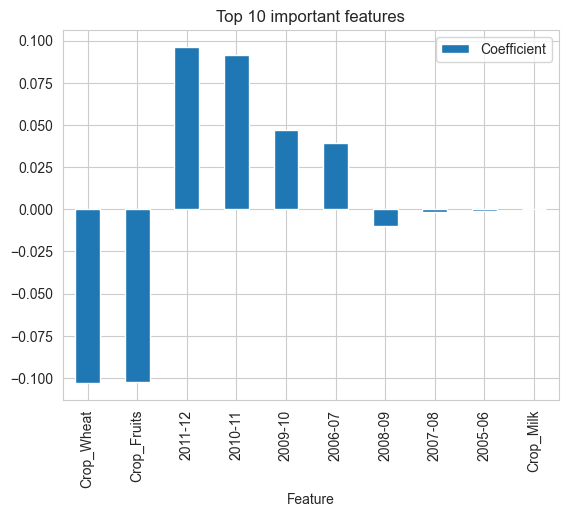

Processing datafile1.csv...
Columns in dataset: ['Cost of Cultivation (`/Hectare) C2', 'Yield (Quintal/ Hectare) ', 'Cost of Production (`/Quintal) C2', 'Crop_SUGARCANE', 'Crop_WHEAT', 'State_Maharashtra', 'State_Karnataka', 'Crop_COTTON', 'State_Tamil Nadu', 'Crop_MOONG', 'Cost of Cultivation (`/Hectare) A2+FL']
Evaluating Random Forest on datafile1.csv...
Training RMSE: 0.02157793331848263
Validation RMSE: 0.06389853617622093
Evaluating Decision Tree on datafile1.csv...
Training RMSE: 0.0
Validation RMSE: 0.08042426169101538
Evaluating Neural Network on datafile1.csv...
Training RMSE: 0.041921887836857644
Validation RMSE: 0.19500873699434715
Summary of results for datafile1.csv:
Random Forest:
  Validation RMSE: 0.06389853617622093
Decision Tree:
  Validation RMSE: 0.08042426169101538
Neural Network:
  Validation RMSE: 0.19500873699434715
Best model for datafile1.csv is Random Forest with Validation RMSE of 0.06389853617622093
Feature importances for Random Forest:
                  

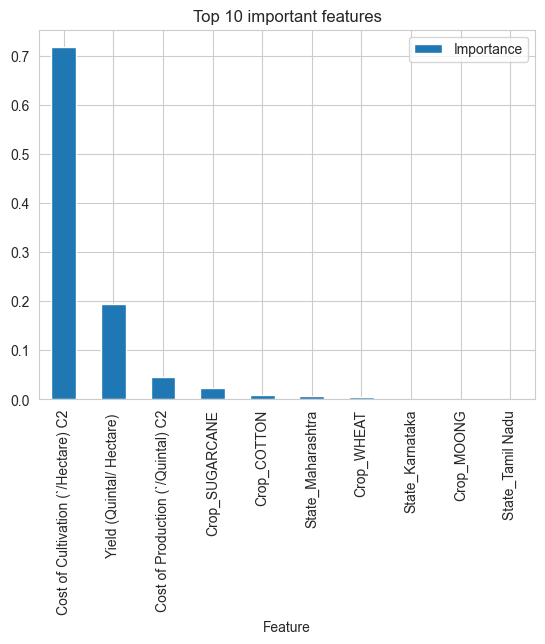

Processing datafile2.csv...
Columns in dataset: ['Production 2009-10', 'Production 2007-08', 'Crop             _Total Spices', 'Production 2008-09', 'Yield 2007-08', 'Area 2007-08', 'Area 2006-07', 'Yield 2010-11', 'Yield 2009-10', 'Yield 2006-07', 'Production 2006-07']
Evaluating Random Forest on datafile2.csv...
Training RMSE: 0.051256087654794585
Validation RMSE: 0.011407975956417718
Evaluating Decision Tree on datafile2.csv...
Training RMSE: 0.0
Validation RMSE: 0.018674077912247962
Evaluating Neural Network on datafile2.csv...
Training RMSE: 0.12670780691968156
Validation RMSE: 0.05573421897530512
Summary of results for datafile2.csv:
Random Forest:
  Validation RMSE: 0.011407975956417718
Decision Tree:
  Validation RMSE: 0.018674077912247962
Neural Network:
  Validation RMSE: 0.05573421897530512
Best model for datafile2.csv is Random Forest with Validation RMSE of 0.011407975956417718
Feature importances for Random Forest:
                          Feature  Importance
1          

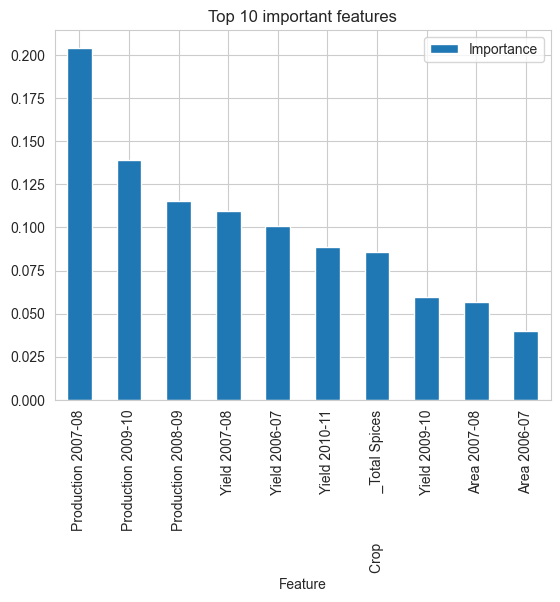

Processing datafile3.csv...
Columns in dataset: ['Recommended Zone_Maharshtra, and Karnataka under rainfed condition and restricted irrigated condition.', 'Variety_Pusa Prachi (HI 1563)', 'Recommended Zone_Maharashtra, Karnataka, Andhra Pradesh and Tamil Nadu under timely sown irrigated condition.', 'Variety_Netravati  (NIAW 1415)', 'Recommended Zone_Himachal Pradesh,  Jammu & Kashmir, Uttarakhand and Sikkim under timely sown irrigated conditions.', 'Recommended Zone_Himachal Pradesh, Uttarakhand, Jammu and Kashmir and the North Eastern state under timely sown rainfed condition in lower and mid hills.', 'Variety_Pusa Suketi  HS 507', 'Recommended Zone_Punjab, Haryana, Delhi, Rajasthan (except Kota and Udaipur divisions), West Uttar Pradesh (except Jhansi Divisions) Jammu and Kathua districts of Jammu and Kashmir, Paonta valley and Una district of Himachal Pradesh, and tarai region of Uttarakhand.', 'Variety_MPO(JW)  1215 (MPO 1215)', 'Variety_MACS 6222', 'Crop_Wheat']
Evaluating Neural

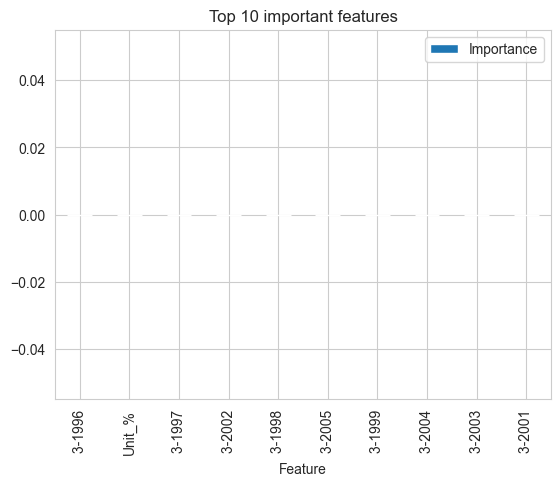

In [24]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def apply_smote_if_needed(X_train, y_train):
    y_train = np.asarray(y_train, dtype=np.float64)  
    if len(np.unique(y_train)) == 2 and min(Counter(y_train).values()) >= 6:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    return X_train_resampled, y_train_resampled
def evaluate_model(model, X_train, X_test, y_train, y_test, problem_type):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    if problem_type == "classification":
        metrics = {
            'train_acc': accuracy_score(y_train, y_train_pred),
            'test_acc': accuracy_score(y_test, y_test_pred),
            'train_precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
            'train_recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
            'train_f1': f1_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_f1': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
        }
        print(f"Training Accuracy: {metrics['train_acc']}")
        print(f"Validation Accuracy: {metrics['test_acc']}")
        print(f"Training Precision: {metrics['train_precision']}")
        print(f"Validation Precision: {metrics['test_precision']}")
        print(f"Training Recall: {metrics['train_recall']}")
        print(f"Validation Recall: {metrics['test_recall']}")
        print(f"Training F1-score: {metrics['train_f1']}")
        print(f"Validation F1-score: {metrics['test_f1']}")

        print("Training Classification Report:")
        print(classification_report(y_train, y_train_pred, zero_division=1))
        print("Validation Classification Report:")
        print(classification_report(y_test, y_test_pred, zero_division=1))
    else: 
        metrics = {
            'train_rmse': mean_squared_error(y_train, y_train_pred, squared=False),
            'test_rmse': mean_squared_error(y_test, y_test_pred, squared=False)
        }
        print(f"Training RMSE: {metrics['train_rmse']}")
        print(f"Validation RMSE: {metrics['test_rmse']}")

    # Save the trained model
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    
    return metrics

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for filename, df in datasets.items():
    print(f"Processing {filename}...")
    print("Columns in dataset:", df.columns.tolist())
    df = df.dropna()
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
        elif df[column].dtype == 'bool':  
            df[column] = df[column].astype(int)
    target_column = target_columns[filename]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {filename}.")
        continue
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    problem_type = "regression" if y.nunique() > 10 else "classification"
    stratify = y if problem_type == "classification" and y.value_counts().min() > 1 else None
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=stratify)
    except ValueError as e:
        print(f"Stratified split failed: {e}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    if problem_type == "classification":
        X_train, y_train = apply_smote_if_needed(X_train, y_train)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if problem_type == "classification":
        models = {
            "Neural Network": MLPClassifier(random_state=42, max_iter=500),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
            "Random Forest": RandomForestClassifier(random_state=42),
            "SVM": SVC(random_state=42)
        }
    else:
        models = {
            "Random Forest": RandomForestRegressor(random_state=42),
            "Decision Tree": DecisionTreeRegressor(random_state=42),
            "Neural Network": MLPRegressor(random_state=42, max_iter=500)
        }
    results = {}
    for model_name, model in models.items():
        print(f"Evaluating {model_name} on {filename}...")
        if model_name == "Neural Network":
            metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, problem_type)
        else:
            metrics = evaluate_model(model, X_train, X_test, y_train, y_test, problem_type)
        results[model_name] = metrics
    print(f"Summary of results for {filename}:")
    best_model = None
    if problem_type == "classification":
        best_test_f1 = 0
        for model_name, metrics in results.items():
            print(f"{model_name}:")
            print(f"  Validation Accuracy: {metrics['test_acc']}")
            print(f"  Validation Precision: {metrics['test_precision']}")
            print(f"  Validation Recall: {metrics['test_recall']}")
            print(f"  Validation F1-score: {metrics['test_f1']}")
            if metrics['test_f1'] > best_test_f1:
                best_test_f1 = metrics['test_f1']
                best_model = model_name
        print(f"Best model for {filename} is {best_model} with Validation F1-score of {best_test_f1}")
    else:
        best_test_rmse = float('inf')
        for model_name, metrics in results.items():
            print(f"{model_name}:")
            print(f"  Validation RMSE: {metrics['test_rmse']}")
            if metrics['test_rmse'] < best_test_rmse:
                best_test_rmse = metrics['test_rmse']
                best_model = model_name
        print(f"Best model for {filename} is {best_model} with Validation RMSE of {best_test_rmse}")
    if best_model == "Logistic Regression":
        logistic_model = models[best_model]
        coefficients = logistic_model.coef_[0]
        feature_names = X.columns
        coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
        coef_df["Absolute Coefficient"] = coef_df["Coefficient"].abs()
        coef_df = coef_df.sort_values(by="Absolute Coefficient", ascending=False)
        print("Feature importances for Logistic Regression:")
        print(coef_df.head(10))
        coef_df.plot(kind="bar", x="Feature", y="Coefficient", title="Top 10 important features")
        plt.show()
    elif best_model == "Random Forest":
        random_forest_model = models[best_model]
        feature_importances = random_forest_model.feature_importances_
        feature_names = X.columns
        feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
        feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
        print("Feature importances for Random Forest:")
        print(feat_imp_df.head(10))
        feat_imp_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()
    elif best_model == "Decision Tree":
        decision_tree_model = models[best_model]
        feature_importances = decision_tree_model.feature_importances_
        feature_names = X.columns
        feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
        feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
        print("Feature importances for Decision Tree:")
        print(feat_imp_df.head(10))
        feat_imp_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()
    elif best_model == "Neural Network":
        neural_network_model = models[best_model]
        perm_importance = permutation_importance(neural_network_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        perm_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
        perm_df = perm_df.sort_values(by="Importance", ascending=False)
        print("Permutation importances for Neural Network:")
        print(perm_df.head(10))
        perm_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()


Processing datafile.csv...
Columns in dataset: ['2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2011-12', '2010-11', 'Crop_Wheat', 'Crop_Milk', 'Crop_Fruits', 'Crop_All Agriculture']
Evaluating Neural Network on datafile.csv...
Training Accuracy: 1.0
Validation Accuracy: 0.5
Training Precision: 1.0
Validation Precision: 0.8333333333333334
Training Recall: 1.0
Validation Recall: 0.5
Training F1-score: 1.0
Validation F1-score: 0.5
Training Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

  

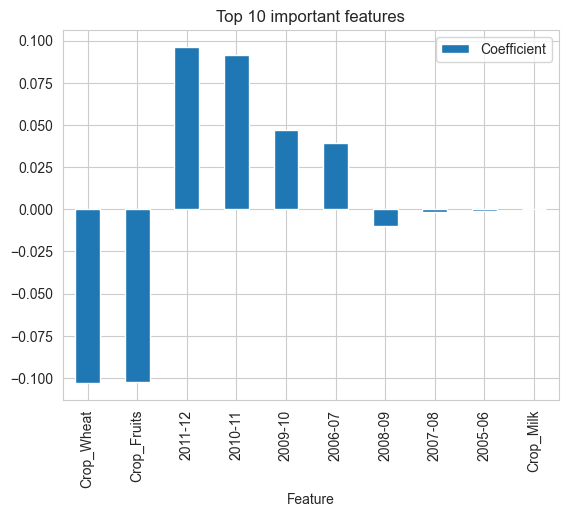

Processing datafile1.csv...
Columns in dataset: ['Cost of Cultivation (`/Hectare) C2', 'Yield (Quintal/ Hectare) ', 'Cost of Production (`/Quintal) C2', 'Crop_SUGARCANE', 'Crop_WHEAT', 'State_Maharashtra', 'State_Karnataka', 'Crop_COTTON', 'State_Tamil Nadu', 'Crop_MOONG', 'Cost of Cultivation (`/Hectare) A2+FL']
Evaluating Random Forest on datafile1.csv...
Training RMSE: 0.02157793331848263
Validation RMSE: 0.06389853617622093
Evaluating Decision Tree on datafile1.csv...
Training RMSE: 0.0
Validation RMSE: 0.08042426169101538
Evaluating Neural Network on datafile1.csv...
Training RMSE: 0.041921887836857644
Validation RMSE: 0.19500873699434715
Summary of results for datafile1.csv:
Random Forest:
  Validation RMSE: 0.06389853617622093
Decision Tree:
  Validation RMSE: 0.08042426169101538
Neural Network:
  Validation RMSE: 0.19500873699434715
Best model for datafile1.csv is Random Forest with Validation RMSE of 0.06389853617622093
Feature importances for Random Forest:
                  

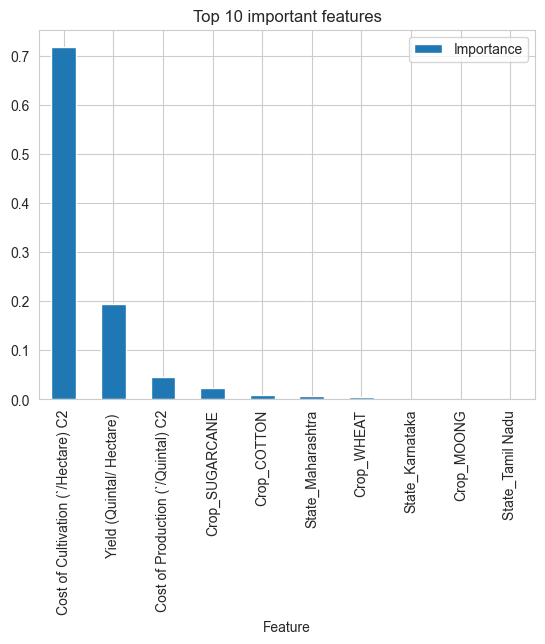

Processing datafile2.csv...
Columns in dataset: ['Production 2009-10', 'Production 2007-08', 'Crop             _Total Spices', 'Production 2008-09', 'Yield 2007-08', 'Area 2007-08', 'Area 2006-07', 'Yield 2010-11', 'Yield 2009-10', 'Yield 2006-07', 'Production 2006-07']
Evaluating Random Forest on datafile2.csv...
Training RMSE: 0.051256087654794585
Validation RMSE: 0.011407975956417718
Evaluating Decision Tree on datafile2.csv...
Training RMSE: 0.0
Validation RMSE: 0.018674077912247962
Evaluating Neural Network on datafile2.csv...
Training RMSE: 0.12670780691968156
Validation RMSE: 0.05573421897530512
Summary of results for datafile2.csv:
Random Forest:
  Validation RMSE: 0.011407975956417718
Decision Tree:
  Validation RMSE: 0.018674077912247962
Neural Network:
  Validation RMSE: 0.05573421897530512
Best model for datafile2.csv is Random Forest with Validation RMSE of 0.011407975956417718
Feature importances for Random Forest:
                          Feature  Importance
1          

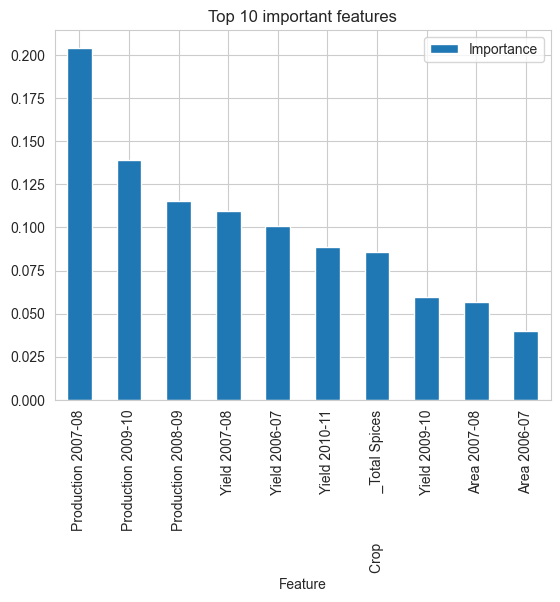

Processing datafile3.csv...
Columns in dataset: ['Recommended Zone_Maharshtra, and Karnataka under rainfed condition and restricted irrigated condition.', 'Variety_Pusa Prachi (HI 1563)', 'Recommended Zone_Maharashtra, Karnataka, Andhra Pradesh and Tamil Nadu under timely sown irrigated condition.', 'Variety_Netravati  (NIAW 1415)', 'Recommended Zone_Himachal Pradesh,  Jammu & Kashmir, Uttarakhand and Sikkim under timely sown irrigated conditions.', 'Recommended Zone_Himachal Pradesh, Uttarakhand, Jammu and Kashmir and the North Eastern state under timely sown rainfed condition in lower and mid hills.', 'Variety_Pusa Suketi  HS 507', 'Recommended Zone_Punjab, Haryana, Delhi, Rajasthan (except Kota and Udaipur divisions), West Uttar Pradesh (except Jhansi Divisions) Jammu and Kathua districts of Jammu and Kashmir, Paonta valley and Una district of Himachal Pradesh, and tarai region of Uttarakhand.', 'Variety_MPO(JW)  1215 (MPO 1215)', 'Variety_MACS 6222', 'Crop_Wheat']
Evaluating Neural

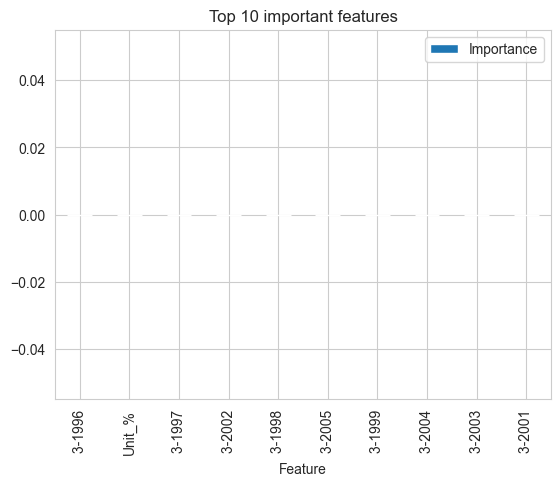

In [25]:
target_columns = {
    "datafile.csv": "Crop_All Agriculture",
    "datafile1.csv": "Cost of Cultivation (`/Hectare) A2+FL",
    "datafile2.csv": "Production 2006-07", 
    "datafile3.csv": "Crop_Wheat",  
    "produce.csv": "Particulars_(DC)Agricultural Coverage Under Irrigation"
}
def apply_smote_if_needed(X_train, y_train):
    y_train = np.asarray(y_train, dtype=np.float64) 
    if len(np.unique(y_train)) == 2 and min(Counter(y_train).values()) >= 6:
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    return X_train_resampled, y_train_resampled
def evaluate_model(model, X_train, X_test, y_train, y_test, problem_type):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    if problem_type == "classification":
        metrics = {
            'train_acc': accuracy_score(y_train, y_train_pred),
            'test_acc': accuracy_score(y_test, y_test_pred),
            'train_precision': precision_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_precision': precision_score(y_test, y_test_pred, average='weighted', zero_division=1),
            'train_recall': recall_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_recall': recall_score(y_test, y_test_pred, average='weighted', zero_division=1),
            'train_f1': f1_score(y_train, y_train_pred, average='weighted', zero_division=1),
            'test_f1': f1_score(y_test, y_test_pred, average='weighted', zero_division=1)
        }
        print(f"Training Accuracy: {metrics['train_acc']}")
        print(f"Validation Accuracy: {metrics['test_acc']}")
        print(f"Training Precision: {metrics['train_precision']}")
        print(f"Validation Precision: {metrics['test_precision']}")
        print(f"Training Recall: {metrics['train_recall']}")
        print(f"Validation Recall: {metrics['test_recall']}")
        print(f"Training F1-score: {metrics['train_f1']}")
        print(f"Validation F1-score: {metrics['test_f1']}")
        print("Training Classification Report:")
        print(classification_report(y_train, y_train_pred, zero_division=1))
        print("Validation Classification Report:")
        print(classification_report(y_test, y_test_pred, zero_division=1))
    else:  
        metrics = {
            'train_rmse': mean_squared_error(y_train, y_train_pred, squared=False),
            'test_rmse': mean_squared_error(y_test, y_test_pred, squared=False)
        }
        print(f"Training RMSE: {metrics['train_rmse']}")
        print(f"Validation RMSE: {metrics['test_rmse']}")

    # Save the trained model
    model_filename = os.path.join(model_dir, f"{name.replace('.csv', '')}_model.pkl")
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    
    return metrics
    
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
    plt.title(title)
    plt.show()

model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

for filename, df in datasets.items():
    print(f"Processing {filename}...")
    print("Columns in dataset:", df.columns.tolist())
    df = df.dropna()
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])
        elif df[column].dtype == 'bool': 
            df[column] = df[column].astype(int)
    target_column = target_columns[filename]
    if target_column not in df.columns:
        print(f"Target column '{target_column}' not found in {filename}.")
        continue
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    problem_type = "regression" if y.nunique() > 10 else "classification"
    stratify = y if problem_type == "classification" and y.value_counts().min() > 1 else None
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=stratify)
    except ValueError as e:
        print(f"Stratified split failed: {e}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    if problem_type == "classification":
        X_train, y_train = apply_smote_if_needed(X_train, y_train)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if problem_type == "classification":
        models = {
            "Neural Network": MLPClassifier(random_state=42, max_iter=500),
            "Decision Tree": DecisionTreeClassifier(random_state=42),
            "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
            "Random Forest": RandomForestClassifier(random_state=42),
            "SVM": SVC(random_state=42, probability=True)
        }
    else:
        models = {
            "Random Forest": RandomForestRegressor(random_state=42),
            "Decision Tree": DecisionTreeRegressor(random_state=42),
            "Neural Network": MLPRegressor(random_state=42, max_iter=500)
        }
    results = {}
    for model_name, model in models.items():
        print(f"Evaluating {model_name} on {filename}...")
        if model_name == "Neural Network":
            metrics = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, problem_type)
        else:
            metrics = evaluate_model(model, X_train, X_test, y_train, y_test, problem_type)
        results[model_name] = metrics
    print(f"Summary of results for {filename}:")
    best_model = None
    if problem_type == "classification":
        best_test_f1 = 0
        for model_name, metrics in results.items():
            print(f"{model_name}:")
            print(f"  Validation Accuracy: {metrics['test_acc']}")
            print(f"  Validation Precision: {metrics['test_precision']}")
            print(f"  Validation Recall: {metrics['test_recall']}")
            print(f"  Validation F1-score: {metrics['test_f1']}")
            if metrics['test_f1'] > best_test_f1:
                best_test_f1 = metrics['test_f1']
                best_model = model_name
        print(f"Best model for {filename} is {best_model} with Validation F1-score of {best_test_f1}")
    else:
        best_test_rmse = float('inf')
        for model_name, metrics in results.items():
            print(f"{model_name}:")
            print(f"  Validation RMSE: {metrics['test_rmse']}")
            if metrics['test_rmse'] < best_test_rmse:
                best_test_rmse = metrics['test_rmse']
                best_model = model_name
        print(f"Best model for {filename} is {best_model} with Validation RMSE of {best_test_rmse}")
    if best_model == "Logistic Regression":
        logistic_model = models[best_model]
        coefficients = logistic_model.coef_[0]
        feature_names = X.columns
        coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
        coef_df["Absolute Coefficient"] = coef_df["Coefficient"].abs()
        coef_df = coef_df.sort_values(by="Absolute Coefficient", ascending=False)
        print("Feature importances for Logistic Regression:")
        print(coef_df.head(10))
        coef_df.plot(kind="bar", x="Feature", y="Coefficient", title="Top 10 important features")
        plt.show()
    elif best_model == "Random Forest":
        random_forest_model = models[best_model]
        feature_importances = random_forest_model.feature_importances_
        feature_names = X.columns
        feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
        feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
        print("Feature importances for Random Forest:")
        print(feat_imp_df.head(10))
        feat_imp_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()
    elif best_model == "Decision Tree":
        decision_tree_model = models[best_model]
        feature_importances = decision_tree_model.feature_importances_
        feature_names = X.columns
        feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
        feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
        print("Feature importances for Decision Tree:")
        print(feat_imp_df.head(10))
        feat_imp_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()
    elif best_model == "Neural Network":
        neural_network_model = models[best_model]
        perm_importance = permutation_importance(neural_network_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
        perm_df = pd.DataFrame({"Feature": X.columns, "Importance": perm_importance.importances_mean})
        perm_df = perm_df.sort_values(by="Importance", ascending=False)
        print("Permutation importances for Neural Network:")
        print(perm_df.head(10))
        perm_df.plot(kind="bar", x="Feature", y="Importance", title="Top 10 important features")
        plt.show()
    if problem_type == "classification" and X.shape[1] == 2:
        best_clf = models[best_model]
        if best_model == "Neural Network":
            plot_decision_boundaries(X_test_scaled, y_test, best_clf, f"Decision Boundary of {best_model} on {filename}")
        else:
            plot_decision_boundaries(X_test.values, y_test, best_clf, f"Decision Boundary of {best_model} on {filename}")
